TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

QUESTION 1.1 — STATISTIQUES DESCRIPTIVES

📊 PORTEFEUILLE CONSERVATIVE (A)
	• Rendement mensuel moyen : 0.94%
	• Écart-type mensuel : 0.48%
	• Médiane : 1.00%
	• Rendement annualisé : 11.85%
	• Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
	• Rendement mensuel moyen : 2.89%
	• Écart-type mensuel : 4.45%
	• Médiane : 4.70%
	• Rendement annualisé : 40.79%
	• Volatilité annualisée : 15.41%


/tmp/ipython-input-76608768.py:94: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([rendements_A, rendements_B], labels=['A', 'B'])


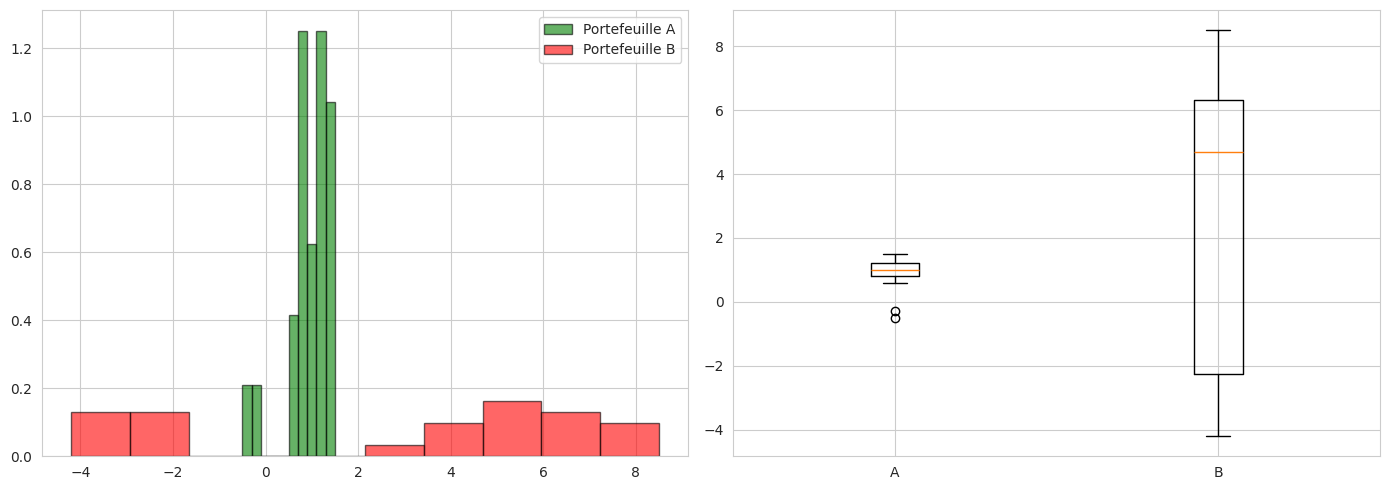


🎯 RECOMMANDATION
✅ PORTEFEUILLE A RECOMMANDÉ


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

# Paramètres
capital = 500000 # € à investir
perte_max_toleree = 50000 # € (10% capital)
taux_sans_risque = 3.0 # % annuel

# ============================================================================ # QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.1 — STATISTIQUES DESCRIPTIVES")
print("="*80)

def calculer_stats_portefeuille(rendements, nom):
    """
    Calcule statistiques descriptives portefeuille
    """
    # a) Moyenne mensuelle
    moyenne_mensuelle = np.mean(rendements)

    # b) Écart-type mensuel
    ecart_type_mensuel = np.std(rendements, ddof=1)

    # c) Médiane
    mediane = np.median(rendements)

    # d) Rendement annualisé
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100

    # e) Volatilité annualisée
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    stats_dict = {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }
    return stats_dict

# Calcul stats
stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

# Affichage résultats
for s in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {s['nom']}")
    print(f"\t• Rendement mensuel moyen : {s['moyenne_mensuelle']:.2f}%")
    print(f"\t• Écart-type mensuel : {s['ecart_type_mensuel']:.2f}%")
    print(f"\t• Médiane : {s['mediane']:.2f}%")
    print(f"\t• Rendement annualisé : {s['rendement_annuel']:.2f}%")
    print(f"\t• Volatilité annualisée : {s['volatilite_annuelle']:.2f}%")

# ============================================================================ # QUESTION 1.2 — VISUALISATION
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
ax1 = axes[0]
ax1.hist(rendements_A, bins=10, alpha=0.6, color='green', edgecolor='black', label='Portefeuille A', density=True)
ax1.hist(rendements_B, bins=10, alpha=0.6, color='red', edgecolor='black', label='Portefeuille B', density=True)
ax1.legend()

ax2 = axes[1]
ax2.boxplot([rendements_A, rendements_B], labels=['A', 'B'])
plt.tight_layout()
plt.show()

# ============================================================================ # QUESTION 1.3 — VaR
# ============================================================================

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    z_alpha = stats.norm.ppf(alpha)
    var_mensuelle_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']
    var_annuelle_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    return {
        'var_mensuelle_euros': capital * (var_mensuelle_pct / 100),
        'var_annuelle_euros': capital * (var_annuelle_pct / 100)
    }

var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

# Validation contrainte
contrainte_A = abs(var_A['var_annuelle_euros']) <= perte_max_toleree
contrainte_B = abs(var_B['var_annuelle_euros']) <= perte_max_toleree

# ============================================================================ # QUESTION 1.4 — SHARPE
# ============================================================================

sharpe_A = (stats_A['rendement_annuel'] - taux_sans_risque) / stats_A['volatilite_annuelle']
sharpe_B = (stats_B['rendement_annuel'] - taux_sans_risque) / stats_B['volatilite_annuelle']

print(f"\n🎯 RECOMMANDATION")
if contrainte_A and (not contrainte_B or sharpe_A > sharpe_B):
    print("✅ PORTEFEUILLE A RECOMMANDÉ")
else:
    print("✅ PORTEFEUILLE B RECOMMANDÉ")